## Transient force in a DC Contactor

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

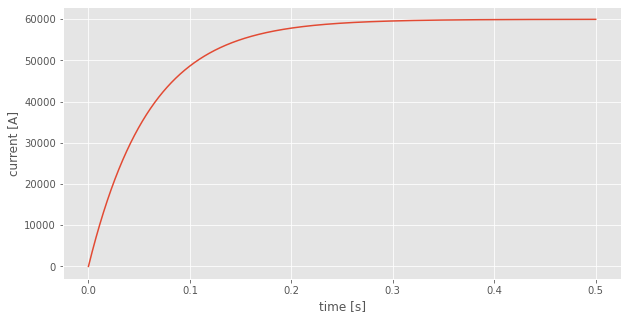

In [254]:
# definition of time of simulation [s]
t = np.linspace(0, 0.5, 100000)

# time constant of a circuit [ms]
T = 60/1000

# definition of current[A]
I = 60000*(1-np.exp(-t/T))

# plotting the current
plt.figure(figsize=(10,5))
plt.xlabel('time [s]')
plt.ylabel('current [A]')
plt.plot(t, I);

In [255]:
# magnetic circuit data

# number of turns
z = 1

# thickness of the magnetic gap [mm]
delta = 20/1000

# cross-section of the magnetic gap [mm2]
S = 30/1000 * 30/1000

# magnetic permeability of vaccum [H/m]
mu_o = 4*np.pi*1e-7

### Calculation of the force for a constant gap

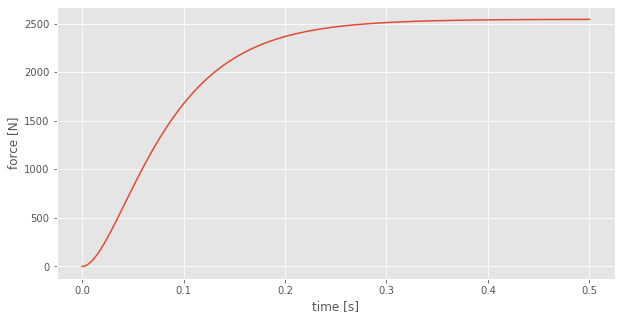

In [256]:
# electrodynamic force
Fe1 = 1/4 * (z * I)**2 * mu_o * S / delta**2

# plotting the force
plt.figure(figsize=(10,5))
plt.xlabel('time [s]')
plt.ylabel('force [N]')
plt.plot(t, Fe1);

### Calculation of the force when the gap changes

In [257]:
# mechnical force [kN]
Fm = 1 * 1000 

In [272]:
# electrodynamic force
Fe = []
Fe.append(0)

# mass of the armature [g]
m = 300 /1000

# velocity [m/s]
v = []
v.append(0)

# displacement [m]
x = []
x.append(0)

# gap [m]
g = []
g.append(delta)

# time step
dt = t[-1]/len(t)

for n in range(1, len(I)):
    Fe_int = 1/4 * (z * I[n])**2 * mu_o * S / g[n-1]**2
    if Fm > Fe_int:
        Fe.append(Fe_int)
        v_inc = 0 # no change in velocity
        x_inc = 0 # no change in discplacement
        gap_int = g[n-1] # air gap remains the same
        v.append(v[n-1] + v_inc)
        x.append(x[n-1] + x_inc)
        g.append(gap_int)
    else:
        v_inc = 1/m * (Fe_int - Fm) * dt # increment o the velocity in a time step
        x_inc = v_inc * dt # increment of displcement in a time step
        g_int = g[n-1] - x_inc # decrease of a gap
        v.append(v[n-1] + v_inc)
        x.append(x[n-1] + x_inc)
        # checking if the gap is not zero 
        if g_int > 0.0001:
            g.append(g_int)
            Fe.append(1/4 * (z * I[n])**2 * mu_o * S / g_int**2)
        else:
            g.append(g[n-1])
            Fe.append(Fe[n-1])

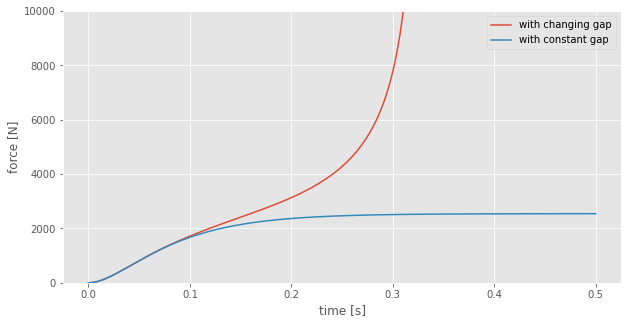

In [273]:
# plotting the force
plt.figure(figsize=(10,5))
plt.xlabel('time [s]')
plt.ylabel('force [N]')
plt.plot(t,Fe, label="with changing gap")
plt.plot(t,Fe1, label="with constant gap")
plt.ylim(0, 10000)
plt.legend();

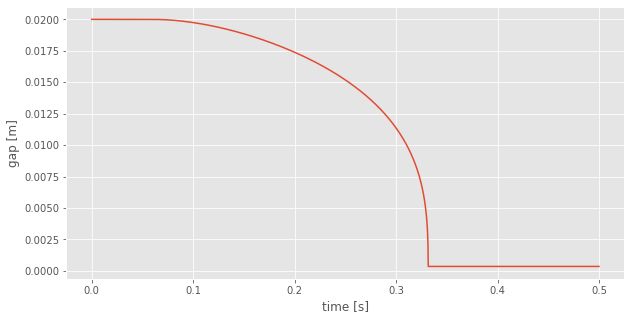

In [274]:
# plotting the gap
plt.figure(figsize=(10,5))
plt.xlabel('time [s]')
plt.ylabel('gap [m]')
plt.plot(t,g);

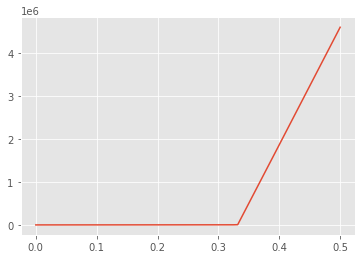

In [275]:
plt.plot(t,v)

(0.0, 0.02)

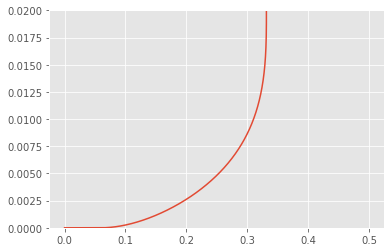

In [276]:
plt.plot(t,x)
plt.ylim(0,0.02)

In [156]:
dt

5e-06